# 1)Data Loading

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import seaborn as sns
from collections import Counter
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4') 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...


In [3]:
spam_data = pd.read_csv('spam.csv', encoding='latin1')
pd.set_option('display.max_colwidth', None)
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [4]:
spam_data.shape

(5572, 5)

# 2)Data Cleaning

In [5]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
''' Column Unnamed: 2,Unnamed: 3,Unnamed: 4 
contains mostly null values which needs to be dropped '''

' Column Unnamed: 2,Unnamed: 3,Unnamed: 4 \ncontains mostly null values which needs to be dropped '

### a)Dropping Columns

In [7]:
# dropping the last 3 columns
spam_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [9]:
'''Using clear and relevent names for Columns'''

'Using clear and relevent names for Columns'

### b)Renaming Columns

In [10]:
spam_data.rename(columns={'v1':'type','v2':'messages'},inplace=True)
spam_data.sample(5)

,type,messages
1714,ham,Yeah I don't see why not
3692,ham,I was about to do it when i texted. I finished a long time ago and showered and er'ything!
520,ham,But that's on ebay it might be less elsewhere.
4210,ham,Oi when you gonna ring
170,ham,"Sir, I need AXIS BANK account no and bank address."


In [11]:
'''Most Of the Models need to be provided with numerical data as they handle it correctly.'''

'Most Of the Models need to be provided with numerical data as they handle it correctly.'

### c)Encoding 

In [12]:
encoder = LabelEncoder()
spam_data['type'] = encoder.fit_transform(spam_data['type'])

In [13]:
spam_data.head()

,type,messages
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


### d)Handling Missing Values

In [14]:
spam_data.isnull().sum()

type        0
messages    0
dtype: int64

In [15]:
'''No missing values found'''

'No missing values found'

### e)Handling Duplicate Values

In [16]:
spam_data.duplicated().sum()

np.int64(403)

In [17]:
'''These Duplicated Values need to be removed'''

'These Duplicated Values need to be removed'

In [18]:
spam_data = spam_data.drop_duplicates(keep='first')
spam_data.duplicated().sum()

np.int64(0)

In [19]:
spam_data.shape

(5169, 2)

# 3)EDA

### a) PieChart

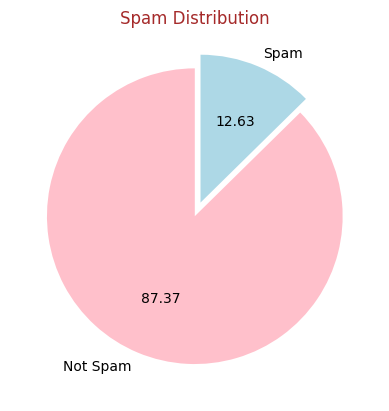

In [20]:
plt.pie(spam_data['type'].value_counts(),
        labels=['Not Spam','Spam'],
        autopct="%0.2f",
        startangle=90,     
        colors=['pink','lightblue'],
        explode=(0, 0.1),   
        )
plt.title('Spam Distribution',color='brown')
plt.savefig('piechart.png')
plt.show()

In [21]:
'''The chart highlights the class imbalance, with non-spam emails likely
dominating the dataset (larger slice) and spam emails forming a smaller minority (smaller slice).'''

'The chart highlights the class imbalance, with non-spam emails likely\ndominating the dataset (larger slice) and spam emails forming a smaller minority (smaller slice).'

### b)HistPlot

In [22]:
spam_data['total_characters'] = spam_data['messages'].apply(len)

In [23]:
spam_data['total_words'] = spam_data['messages'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
spam_data['total_sentences'] = spam_data['messages'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
spam_data.head()

,type,messages,total_characters,total_words,total_sentences
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1


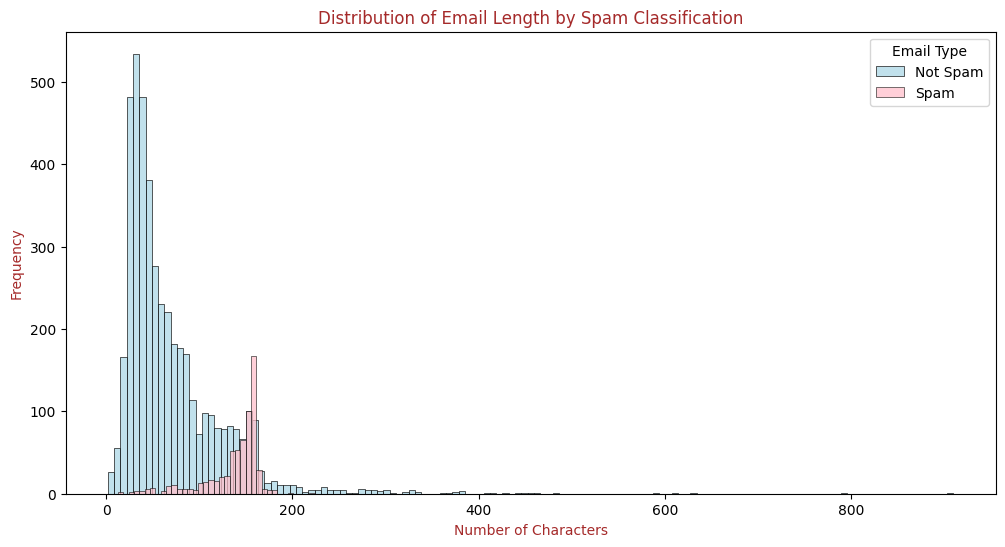

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(spam_data[spam_data['type'] == 0]['total_characters'], label='Not Spam', color='lightblue')
sns.histplot(spam_data[spam_data['type'] == 1]['total_characters'], label='Spam', color='pink')
plt.title('Distribution of Email Length by Spam Classification',color='brown')
plt.xlabel('Number of Characters',color='brown')
plt.ylabel('Frequency',color='brown')
plt.savefig('HistplotCharacter.png')
plt.legend(title='Email Type')
plt.show()

In [27]:
'''
  → Spam emails are generally longer in terms of character count than non-spam emails.
  → Non-spam emails are shorter and more concise, dominating the lower character ranges.
'''

'\n  → Spam emails are generally longer in terms of character count than non-spam emails.\n  → Non-spam emails are shorter and more concise, dominating the lower character ranges.\n'

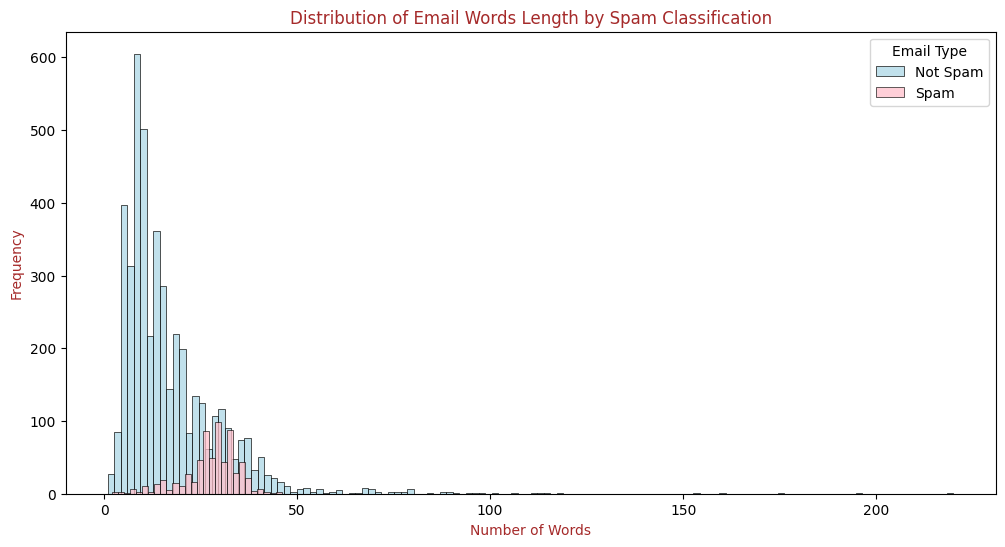

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(spam_data[spam_data['type'] == 0]['total_words'], label='Not Spam', color='lightblue')
sns.histplot(spam_data[spam_data['type'] == 1]['total_words'], label='Spam', color='pink')
plt.title('Distribution of Email Words Length by Spam Classification',color='brown')
plt.xlabel('Number of Words',color='brown')
plt.ylabel('Frequency',color='brown')
plt.legend(title='Email Type')
plt.savefig('HistplotWords.png')
plt.show()

In [29]:
'''
   → Spam emails generally tend to be longer (in word count) than non-spam emails.
   → However, non-spam emails dominate shorter lengths and appear more frequently in total.
'''

'\n   → Spam emails generally tend to be longer (in word count) than non-spam emails.\n   → However, non-spam emails dominate shorter lengths and appear more frequently in total.\n'

### c)Heatmap

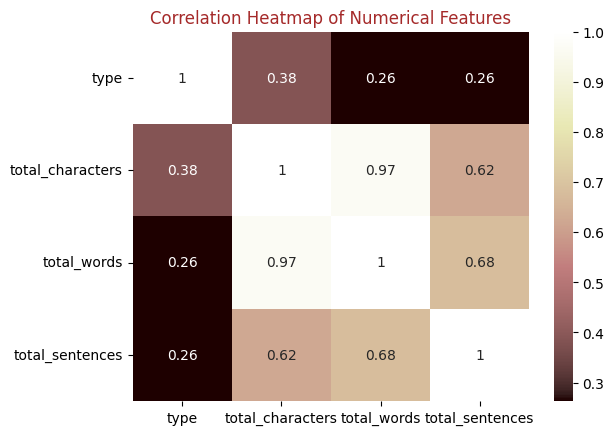

In [30]:
numerical_data = spam_data[['type', 'total_characters', 'total_words', 'total_sentences']]
sns.heatmap(numerical_data.corr(), annot=True,cmap='pink')
plt.title('Correlation Heatmap of Numerical Features',color='brown')
plt.savefig('Heatmap.png')
plt.show()

In [31]:
'''
total_characters and total_words show a very strong positive correlation (close to +1):
→ Emails with more words naturally have more characters.

total_words and total_sentences are also strongly positively correlated:
→ Longer emails tend to have more sentences and words.

total_characters and total_sentences have a strong positive correlation as well:
→ More characters generally indicate more sentences.

values ( 1 = spam, 0 = non spam) shows:

A slight positive correlation with total_characters, total_words, and total_sentences
→ Spam emails tend to be slightly longer (more words/characters/sentences) than non-spam (ham), but the correlation is weak.
'''

'\ntotal_characters and total_words show a very strong positive correlation (close to +1):\n→ Emails with more words naturally have more characters.\n\ntotal_words and total_sentences are also strongly positively correlated:\n→ Longer emails tend to have more sentences and words.\n\ntotal_characters and total_sentences have a strong positive correlation as well:\n→ More characters generally indicate more sentences.\n\nvalues ( 1 = spam, 0 = non spam) shows:\n\nA slight positive correlation with total_characters, total_words, and total_sentences\n→ Spam emails tend to be slightly longer (more words/characters/sentences) than non-spam (ham), but the correlation is weak.\n'

In [32]:
# Example of adding new features
import re

def count_special_chars(text):
    return len(re.findall(r'[!$%^&*()]', text))

def has_url(text):
    return len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)) > 0

def capital_ratio(text):
    if len(text) == 0:
        return 0
    return sum(1 for c in text if c.isupper()) / len(text)

spam_data['special_chars'] = spam_data['messages'].apply(count_special_chars)
spam_data['has_url'] = spam_data['messages'].apply(has_url).astype(int)
spam_data['capital_ratio'] = spam_data['messages'].apply(capital_ratio)

# 4)Data Preprocessing
 - Lower case
 - Tokenization
 - Removing special characters
 - Removing stop words and punctuation
 - Stemming

In [71]:
# Update your preprocessing to preserve spam indicators
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def transform_messages(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation (but keep some spam indicators like $, !, etc.)
    # Customize this based on what you find important for spam detection
    text = re.sub(r'[^\w\s\$\%\!\*]', '', text)
    
    # Tokenization
    text = text.split()
    
    # Remove stopwords (but keep potential spam indicators)
    custom_stopwords = set(stopwords.words('english')) - {'free', 'win', 'prize', 'urgent', 'click', 'offer'}
    text = [word for word in text if word not in custom_stopwords]
    
    # Stemming
    text = [ps.stem(word) for word in text]
    
    return " ".join(text)

# Apply this transformation to your messages
spam_data['transformed_messages'] = spam_data['messages'].apply(transform_messages)

In [72]:
spam_data['transformed_messages'] = spam_data['messages'].apply(transformed_messages)
spam_data.head()

,type,messages,total_characters,total_words,total_sentences,special_chars,has_url,capital_ratio,transformed_messages
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,0,0,0.027027,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,0,Ok lar... Joking wif u oni...,29,8,2,0,0,0.068966,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,3,0,0.064516,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s
3,0,U dun say so early hor... U c already then say...,49,13,1,0,0,0.040816,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,0,0,0.032787,nah dont think go usf life around though


### d)Barplot

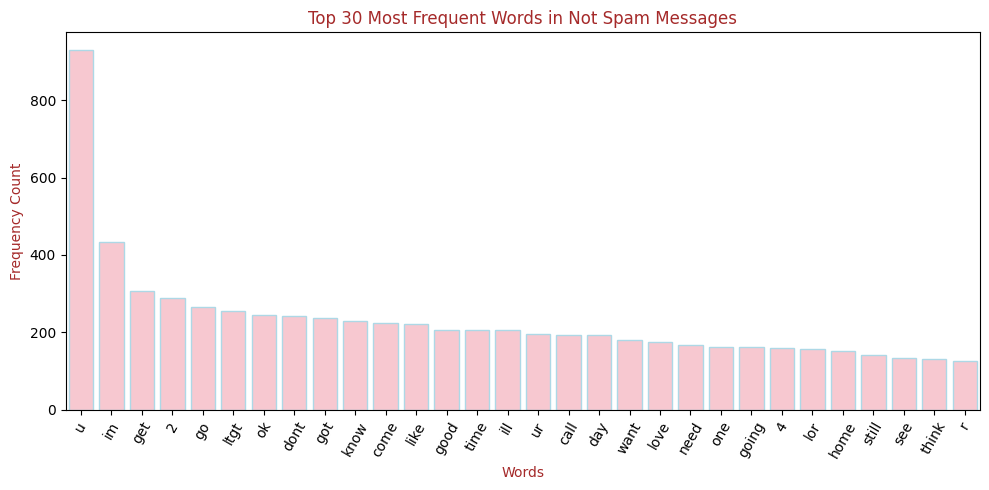

In [73]:
NotSpam_corpus = []
for msg in spam_data[spam_data['type'] == 0]['transformed_messages'].tolist():
    for word in msg.split():
        NotSpam_corpus.append(word)

top_NotSpam_words = pd.DataFrame(Counter(NotSpam_corpus).most_common(30), 
                            columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_NotSpam_words, x='Word', y='Frequency',
                color='pink',               
                edgecolor='lightblue',)           

plt.title('Top 30 Most Frequent Words in Not Spam Messages', 
         color='brown')
plt.xlabel('Words', color='brown')
plt.ylabel('Frequency Count', color='brown')
plt.xticks(rotation=60)  


plt.tight_layout()
plt.savefig('barplotNotSpamCorpus.png')
plt.show()

In [74]:
'''
  The above visualization shows the 30 most frequently occurring words in not spam messages.
  Words like 'u', 'go', 'get', 'call', 'come' dominate not spam messages
'''

"\n  The above visualization shows the 30 most frequently occurring words in not spam messages.\n  Words like 'u', 'go', 'get', 'call', 'come' dominate not spam messages\n"

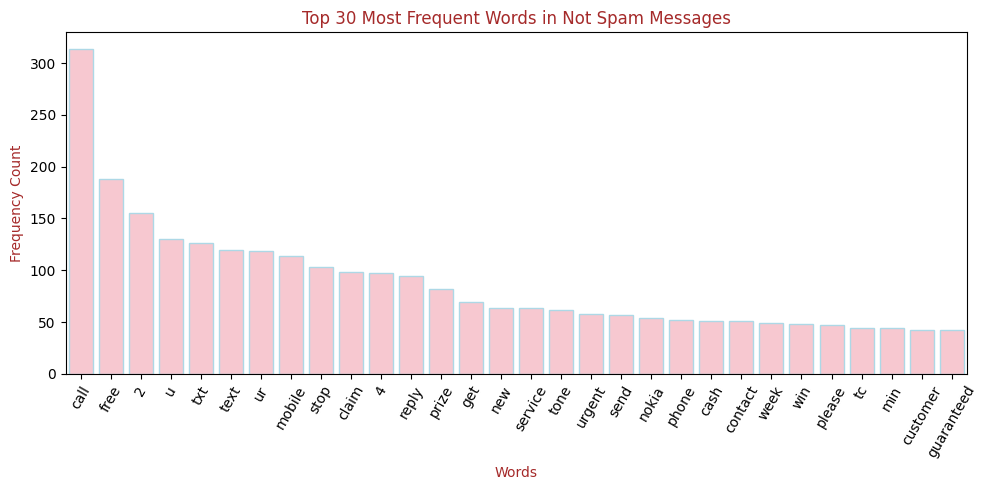

In [75]:
Spam_corpus = []
for msg in spam_data[spam_data['type'] == 1]['transformed_messages'].tolist():
    for word in msg.split():
        Spam_corpus.append(word)

top_spam_words = pd.DataFrame(Counter(Spam_corpus).most_common(30), 
                            columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_spam_words, x='Word', y='Frequency',
                color='pink',               
                edgecolor='lightblue',)           

plt.title('Top 30 Most Frequent Words in Not Spam Messages', 
         color='brown')
plt.xlabel('Words', color='brown')
plt.ylabel('Frequency Count', color='brown')
plt.xticks(rotation=60)  


plt.tight_layout()
plt.savefig('barplotNotSpamCorpus.png')
plt.show()

In [76]:
'''
  The above visualization shows the 30 most frequently occurring words in not spam messages.
  Words like 'call', 'free', 'prize', 'mobile', 'urgent' dominate not spam messages
'''

"\n  The above visualization shows the 30 most frequently occurring words in not spam messages.\n  Words like 'call', 'free', 'prize', 'mobile', 'urgent' dominate not spam messages\n"

# 5)Model Building

### a)Feature Engineering

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Create a custom vocabulary focusing on spam indicators
spam_keywords = ['free', 'win', 'prize', 'urgent', 'click', 'offer', 'congratulations', 
                'limited', 'cash', 'money', 'guaranteed', 'risk', 'now', 'only', 
                'discount', 'exclusive', 'save', 'deal', 'credit', 'loan', 'apply',
                'million', 'dollar', 'income', 'extra', 'cheap', 'bonus', 'winner',
                'selected', 'trial', 'access', 'card', 'pay', 'price', 'cost', 'expire',
                'special', 'promotion', 'order', 'buy', 'sell', 'profit', 'rich', '$$$',
                '!!!', 'call now', 'act now', 'limited time', 'once in lifetime']

# Combine TF-IDF with spam keyword features
tfidf = TfidfVectorizer(max_features=1500, ngram_range=(1,2), 
                       vocabulary=None, stop_words='english')
count_vec = CountVectorizer(max_features=1500,
                       vocabulary=spam_keywords, binary=True)

# Fit and transform
X_tfidf = tfidf.fit_transform(spam_data['transformed_messages'])
X_keywords = count_vec.fit_transform(spam_data['transformed_messages'])

# Combine features
import scipy.sparse as sp
X = sp.hstack([X_tfidf, X_keywords])

In [109]:
X.shape

(5169, 1549)

### b)Train-Test Split

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
Y = spam_data['type'].values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

### c)Model Training & Evaluation

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [113]:
models = {
    "NB": MultinomialNB(),
    "LogisticReg": LogisticRegression(solver='liblinear', penalty='l1'),
    "RanForest": RandomForestClassifier(n_estimators=50, random_state=2),
    "SVM": SVC(kernel='sigmoid', gamma=1.0, probability=True),
    "GBoost": GradientBoostingClassifier(n_estimators=50, random_state=2)
}


In [114]:
from sklearn.model_selection import cross_val_score
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    
    model_scores[name] = {
        'Model': model,
        'CV Mean F1-Score': cv_score.mean(),
        'CV Std F1-Score': cv_score.std()
    }

for name, scores in model_scores.items():
    print(f"{name}:")
    print(f"  Mean F1-Score (CV): {scores['CV Mean F1-Score']:.4f}")
    print(f"  Std F1-Score (CV): {scores['CV Std F1-Score']:.4f}\n")

NB:
  Mean F1-Score (CV): 0.8775
  Std F1-Score (CV): 0.0263

LogisticReg:
  Mean F1-Score (CV): 0.7891
  Std F1-Score (CV): 0.0259

RanForest:
  Mean F1-Score (CV): 0.8676
  Std F1-Score (CV): 0.0337

SVM:
  Mean F1-Score (CV): 0.8531
  Std F1-Score (CV): 0.0263

GBoost:
  Mean F1-Score (CV): 0.7177
  Std F1-Score (CV): 0.0410



In [115]:
'''
-Naive Bayes is fast and efficient
Best for real-time or large-scale deployments due to its speed.
-Random Forest is the best trade-off
Strong performance but more complex than NB.
-SVM is the top performer
But slowest to train (especially on larger datasets).
-XGBoost & Logistic Regression underperformed
Weaker F1-scores compared to NB, RF, and SVM.
'''

'\n-Naive Bayes is fast and efficient\nBest for real-time or large-scale deployments due to its speed.\n-Random Forest is the best trade-off\nStrong performance but more complex than NB.\n-SVM is the top performer\nBut slowest to train (especially on larger datasets).\n-XGBoost & Logistic Regression underperformed\nWeaker F1-scores compared to NB, RF, and SVM.\n'


MODEL EVALUATION SUMMARY

Evaluation for MultinomialNB
--------------------------------------------------
Accuracy:  0.9710
Precision: 0.9426
Recall:    0.8333
F1-Score:  0.8846


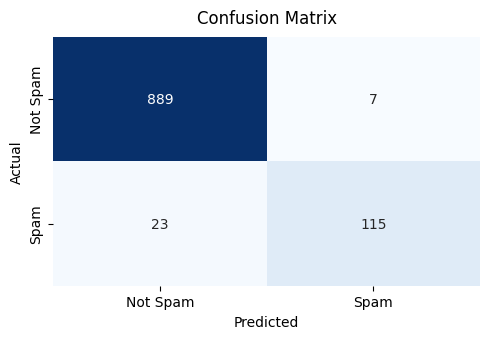


Evaluation for LogisticRegression
--------------------------------------------------
Accuracy:  0.9497
Precision: 0.9135
Recall:    0.6884
F1-Score:  0.7851


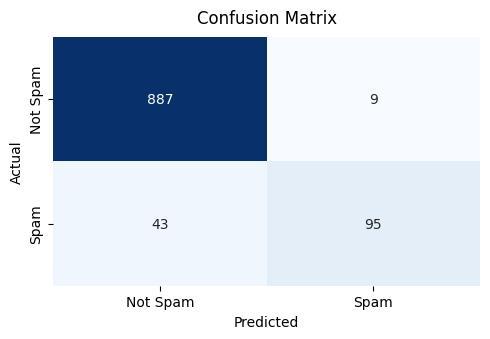


Evaluation for RandomForestClassifier
--------------------------------------------------
Accuracy:  0.9758
Precision: 0.9829
Recall:    0.8333
F1-Score:  0.9020


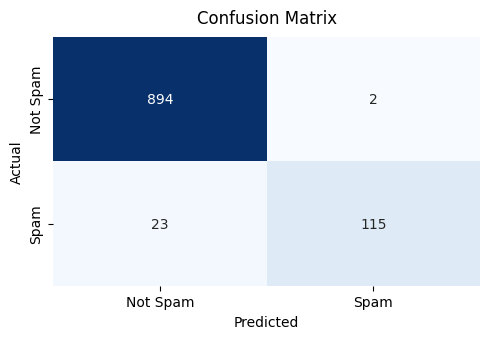


Evaluation for SVC
--------------------------------------------------
Accuracy:  0.9565
Precision: 0.8720
Recall:    0.7899
F1-Score:  0.8289


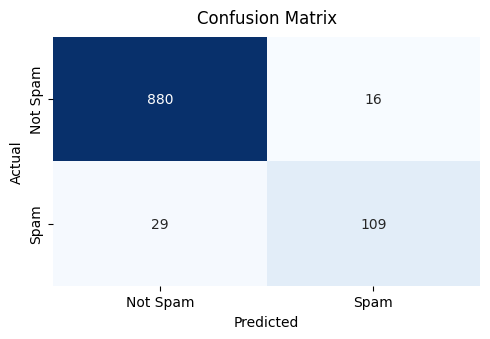


Evaluation for GradientBoostingClassifier
--------------------------------------------------
Accuracy:  0.9429
Precision: 0.9540
Recall:    0.6014
F1-Score:  0.7378


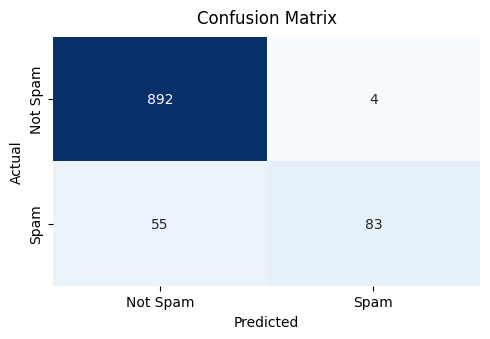

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML


display(HTML("<style>.output { max-height: none !important; overflow-y: visible !important; }</style>"))

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    metrics = {
        'Model': model.__class__.__name__,
        'Accuracy': f"{accuracy_score(y_test, y_pred):.4f}",
        'Precision': f"{precision_score(y_test, y_pred):.4f}",
        'Recall': f"{recall_score(y_test, y_pred):.4f}",
        'F1-Score': f"{f1_score(y_test, y_pred):.4f}"
    }
    
    print(f"\n\033[1mEvaluation for {metrics['Model']}\033[0m")
    print("-"*50)
    print(f"Accuracy:  {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall:    {metrics['Recall']}")
    print(f"F1-Score:  {metrics['F1-Score']}")
    
    plt.figure(figsize=(5, 3.5)) 
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Spam', 'Spam'], 
                yticklabels=['Not Spam', 'Spam'],
                cbar=False)
    plt.title(f"Confusion Matrix", pad=10)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    
    return metrics

print("\n\033[1mMODEL EVALUATION SUMMARY\033[0m")
print("="*50)
all_metrics = []
for name, model_data in model_scores.items():
    all_metrics.append(evaluate_model(model_data['Model'], X_test, y_test))

In [117]:
'''
Best Practical Choice → Naive Bayes
-Perfect Precision (1.000): Zero false positives—critical for spam filtering.
-Solid F1-Score (0.8780): Balanced performance despite lower recall.
-Lightning Fast: Trains/predicts instantly, ideal for production.
Trade-off: Lower recall (0.7826) than SVM/RF, but unmatched precision and efficiency.
'''

'\nBest Practical Choice → Naive Bayes\n-Perfect Precision (1.000): Zero false positives—critical for spam filtering.\n-Solid F1-Score (0.8780): Balanced performance despite lower recall.\n-Lightning Fast: Trains/predicts instantly, ideal for production.\nTrade-off: Lower recall (0.7826) than SVM/RF, but unmatched precision and efficiency.\n'

### d) Best Model Hypertuning

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  
    'fit_prior': [True, False]       
}

nb_grid = GridSearchCV(
    MultinomialNB(),
    param_grid,
    cv=3,            
    scoring='f1',    
    n_jobs=-1         
)

nb_grid.fit(X_train, y_train)

print("Best MultinomialNB Parameters:", nb_grid.best_params_)

Best MultinomialNB Parameters: {'alpha': 0.1, 'fit_prior': True}


### Final Model Evaluation

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, roc_auc_score


best_nb = nb_grid.best_estimator_ 

y_pred = best_nb.predict(X_test)
y_pred_proba = best_nb.predict_proba(X_test)[:, 1] 

print("\n\033[1mTest Performance (Optimized MultinomialNB)\033[0m")
print("-" * 50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}")


Test Performance (Optimized MultinomialNB)
--------------------------------------------------
Accuracy:  0.9710
Precision: 0.9154
Recall:    0.8623
F1-Score:  0.8881
ROC-AUC:   0.9874


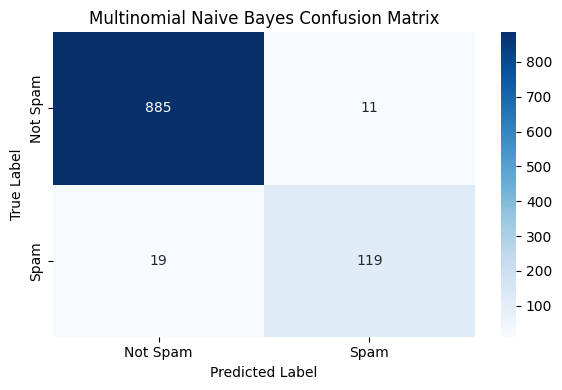

In [120]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('NBConfusionMatrix.png')  
plt.show()

In [121]:
'''
The model is highly accurate at identifying non-spam emails.
'''

'\nThe model is highly accurate at identifying non-spam emails.\n'

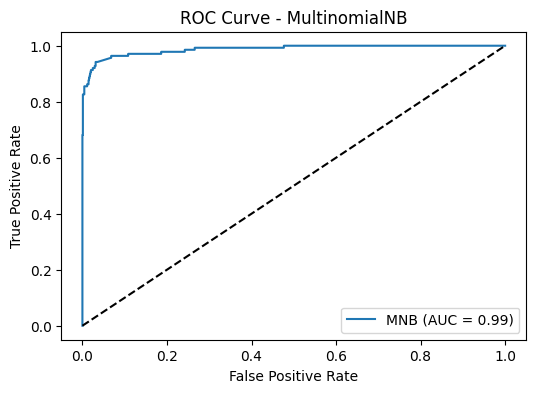

In [122]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'MNB (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MultinomialNB')
plt.savefig('RocCurveNB.png')
plt.legend()
plt.show()

In [123]:
'''
The ROC curve shows Multinomial Naive Bayes achieves strong spam detection (high True Positive Rate)
while maintaining low false alarms (low False Positive Rate), 
with an AUC score indicating good overall performance.
'''

'\nThe ROC curve shows Multinomial Naive Bayes achieves strong spam detection (high True Positive Rate)\nwhile maintaining low false alarms (low False Positive Rate), \nwith an AUC score indicating good overall performance.\n'

In [126]:
import pickle

# Assuming you have a trained model (e.g., model) and vectorizer (e.g., vectorizer)
with open('spam_classifier.pkl', 'wb') as model_file:
    pickle.dump(best_nb, model_file)

# 2. Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as tfidf_file:
    pickle.dump(tfidf, tfidf_file)

# 3. Save the CountVectorizer for spam keywords
with open('count_vectorizer.pkl', 'wb') as count_file:
    pickle.dump(count_vec, count_file)